In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch

In [ ]:
from utils import MnistData
from models import ModelManager, ModelType

In [40]:
model_loaded = ModelManager.get_trained(ModelType.MnistCnnPatt)
generator = ModelManager.get_untrained(ModelType.MnistGanGenerator)
discriminator = ModelManager.get_untrained(ModelType.MnistGanDiscriminator)

In [ ]:
data = MnistData()

In [ ]:
images = None

In [1]:
generator = ModelManager.get_untrained(ModelType.MnistGanGenerator)
discriminator = ModelManager.get_untrained(ModelType.MnistGanDiscriminator)

NameError: name 'ModelManager' is not defined

In [245]:
images = None
batch_size = 10
loss_fn = nn.L1Loss(reduction='sum')
discriminator_optimizer = optim.SGD(discriminator.parameters(), lr=1e-2)
generator_optimizer = optim.SGD(generator.parameters(), lr=1e-1)
# ranom_noise = torch.rand((batch_size, 1, 10))
fixed_batch, _ = data.get_training_batch(batch_size)
for epoch in range(100):
    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()
    batch, _ = data.get_training_batch(batch_size)
    images = generator(model_loaded(fixed_batch) * 0.9)
    loss = loss_fn(discriminator(images), (- 10 * torch.ones((batch_size, 1)))) \
        + loss_fn(discriminator(batch), 10 * torch.ones((batch_size, 1)))
    loss.backward()
    discriminator_optimizer.step()
    
    generator_optimizer.zero_grad()
    loss_two = - loss_fn(discriminator(generator(model_loaded(fixed_batch * 0.9))), (- 10 * torch.ones((batch_size, 1))))
    loss_two.backward()
    generator_optimizer.step()

In [236]:
for epoch in range(1000):
    generator_optimizer.zero_grad()
    images = generator(model_loaded(fixed_batch) * 0.9)
    loss = - loss_fn(discriminator(images), (- 10 * torch.ones((batch_size, 1))))
    generator_optimizer.step()

In [246]:
discriminator(images), discriminator(batch)

(tensor([[-0.9997],
         [-0.9997],
         [-0.9997],
         [-0.9997],
         [-0.9997],
         [-0.9997],
         [-0.9997],
         [-0.9997],
         [-0.9997],
         [-0.9997]], grad_fn=<TanhBackward>),
 tensor([[0.9999],
         [0.9992],
         [1.0000],
         [1.0000],
         [0.9999],
         [0.9987],
         [0.9998],
         [0.9997],
         [0.9990],
         [0.9999]], grad_fn=<TanhBackward>))

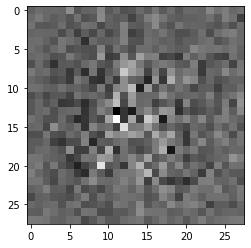

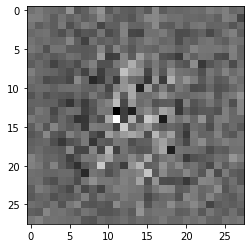

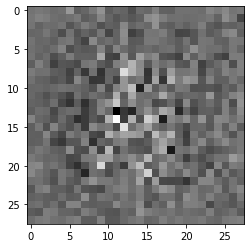

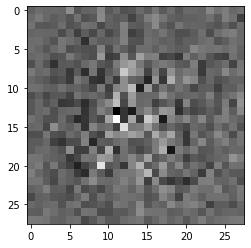

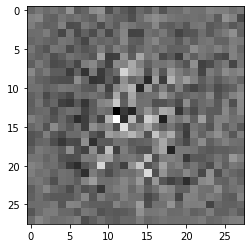

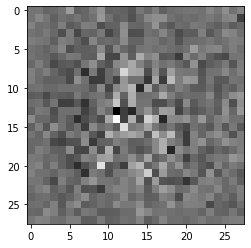

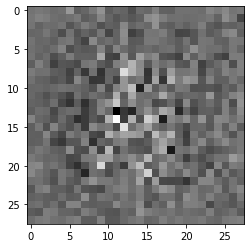

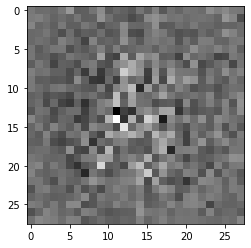

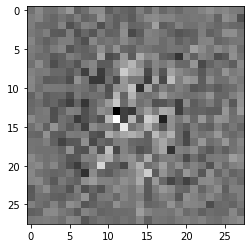

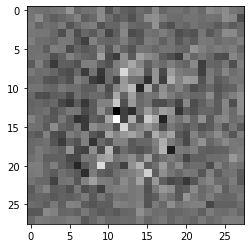

In [247]:
for im in images:
    MnistData.display(im)